![](https://github.com/Ai-Adventures/rmd/blob/master/notebooks/images/logo_full.png?raw=1)

The course is offered by [Ai Adventures](https://aiadventures.in/). The notebooks are created by [Ankur Singh](https://twitter.com/I_ankursingh). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/). Any use for commercial purpose is strictly prohibited.

<a href="https://colab.research.google.com/github/Ai-Adventures/rmd/blob/master/notebooks/01_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Neural Networks**

### **Approach**

Machine learning is taught by academics, for academics. That’s why most material is so dry and math-heavy.

Developers need to know what works and how to use it. We need less math and more tutorials with working code.
___

### **Anatomy of a Neural Network**

Buildind and Training a Neural Network revolves around the following objects:
- **Layers**, which are combined into a network (or model)
- **Input** data and corresponding **targets**
- **Loss function**, which defines the feedback signal used for learning
- **Optimizer**, which determines how learning proceeds

![](https://github.com/Ai-Adventures/rmd/blob/master/notebooks/images/model.png?raw=1)

___
#### Layers
The fundamental data structure in neural networks is the **layer**. You can think of layers as the LEGO bricks of Deep learning, a metaphor that is made explicit by frameworks like keras. Some of the layers are

- Dense or Fully connected layers (Dense).
- Convolution layers (Conv2D, Conv1D).
- Recurrent layers (RNN, LSTM, GRU).

In Keras you don't have to care about **compatibility** between the layers because the layers you add to your models are dynamically built to match the shape of the incoming layer.

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_shape=(28*28,)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


#### Loss Functions and Optimizers

Once the network architecture is defined, you have to choose two major things:

- **Loss function (objective function)** - The quantity that will be minmized during training. It represents a measure of successs for the task at hand.
- **Optimizer** - Determines how the network will be updated based on the loss function. It implements a specific variant of stocastic gradient descent(SGD).
Choosing the right objective function for the right problem is extremely important: your network will take any shortcut it can, to minimize the loss; so if the objective doesn’t fully correlate with success for the task at hand, your network will end up doing things you may not have wanted.

Fortunately, when it comes to common problems such as classification, regression, and sequence prediction, there are simple guidelines you can follow to choose the correct loss. For instance, you’ll use binary_crossentropy for a two-class classification problem, categorical_crossentropy for a many-class classification problem, mean-squared error for a regression problem, connectionist temporal classification(CTC) for a sequence-learning problem, and so on.

**Note:** Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this case, between the ground-truth distribution and your predictions.

In [0]:
## Using optimizer with default settings 
model.compile('rmsprop', 'mse', 
               metrics=['accuracy'])

In [0]:
## Using optimizer with custom argument values
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(),
              loss='mse',
              metrics = ['accuracy']
             )

#### Building your network
You can intuitively understand teh dimensionality of your model as "how much freedom you're allowing the network to have when learning internal representations". Having more hidden units allows the model to learn more-complex representations/functions, but it makes the network more computationally expensive and may lead to learning unwanted patterns.

There are two key architecture decisions to be made about such a stack of Dense layers:

- How many layers to use
- How many hidden units to choose for each layer

All the intermediate layers will use an **Activation Function** like **relu**. Without an activation function, The Dense layer would consist of two linear operations - a dot product and an addition.

So the layer could only learn linear transformations of the input data. Such a model is to restricted and wouldn't benefit from multiple layers fo representations, because a deep stack of linear layers would still implement a linear operation: adding more layers wouldn't extend the learning ability of the model.

In order to get access to a much richer network that would benefit from deep representaions, you need a non-linearity or activation function. relu is the most popular activation function, but there are many other candidates.

**Exercise:** Visit [Tensorflow Playground](https://playground.tensorflow.org/) and try building (writing keras code) some of the models that you see.  

## Regression problem : Predicting house prices


In [0]:
from tensorflow.keras.datasets import boston_housing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.optimizers import RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

##### Loading the dataset

In [3]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [5]:
X_train[:2] # first 2 samples

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00]])

In [6]:
y_train[:2] # first 2 labels

array([15.2, 42.3])

The dataset contains 13 different features:

1. Per capita crime rate.
2. The proportion of residential land zoned for lots over 25,000 square feet.
3. The proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. The average number of rooms per dwelling.
7. The proportion of owner-occupied units built before 1940.
8. Weighted distances to five Boston employment centers.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. Percentage lower status of the population.

Each one of these input data features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

**Labels**

The labels are the house prices in thousands of dollars. (You may notice the mid-1970s prices.)

##### Building the model

In [0]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(13,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile('rmsprop', 'mse', metrics=['mae']) # Mean Absolute Error

In [10]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Train on 404 samples, validate on 102 samples
Epoch 1/20
404/404 [==============================] - 2s 4ms/sample - loss: 654.1954 - mean_absolute_error: 20.2857 - val_loss: 266.8807 - val_mean_absolute_error: 13.9578
Epoch 2/20
404/404 [==============================] - 0s 134us/sample - loss: 180.4370 - mean_absolute_error: 10.3686 - val_loss: 105.2237 - val_mean_absolute_error: 7.8415
Epoch 3/20
404/404 [==============================] - 0s 114us/sample - loss: 75.9257 - mean_absolute_error: 6.4146 - val_loss: 65.5378 - val_mean_absolute_error: 5.9583
Epoch 4/20
404/404 [==============================] - 0s 116us/sample - loss: 75.1681 - mean_absolute_error: 6.5935 - val_loss: 88.0043 - val_mean_absolute_error: 6.5585
Epoch 5/20
404/404 [==============================] - 0s 139us/sample - loss: 69.3611 - mean_absolute_error: 6.1461 - val_loss: 68.0237 - val_mean_absolute_error: 5.3549
Epoch 6/20
404/404 [==============================] - 0s 127us/sample - loss: 70.7745 - mean_absolu

In [11]:
model.predict(X_test[0:2]), y_test[0:2]

(array([[11.028334],
        [21.91686 ]], dtype=float32), array([ 7.2, 18.8]))

In [12]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])

Text(0.5, 1.0, 'Mean Absolute Error')

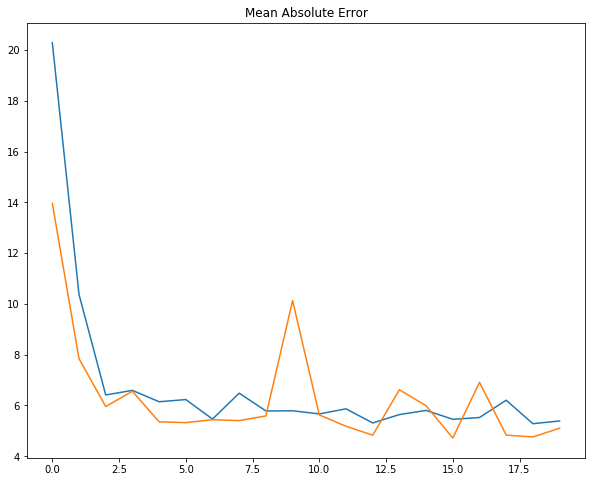

In [13]:
plt.figure(figsize=(10,8))
plt.plot(list(range(20)), history.history['mean_absolute_error'])
plt.plot(list(range(20)), history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error')

**Exercise:** Learn how to save the model you have just trained in the hard-disk. Refer the [docs](https://www.tensorflow.org/guide/keras/save_and_serialize).